# Analysis of The Movie Data Base Data
## The following analysis explores the various attributes of movies in the TMDB dataset

### -What were the most expensive movies each and their adjusted budgets for all available years in the data, and how did they compare to the most profitable and highly voted movies for that year?

### -Which genres did most movies fall under?

# Data Cleaning

In [2]:
# Reading the csv file into a pandas dataframe
import pandas as pd
import numpy as np

np.set_printoptions(suppress=True)
pd.set_option('display.float_format', lambda x: '%.3f' % x)

# I created two data frame objects one that contains the orginal data set, and another that contain and edit or cleaning done
tmdb_data = pd.read_csv('tmdb-movies.csv')
tmdb_data_edited = pd.read_csv('tmdb-movies.csv')

tmdb_data.head()

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,tt0369610,32.986,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,...,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/2015,5562,6.500,2015,137999939.300,1392445893.000
1,76341,tt1392190,28.420,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,http://www.madmaxmovie.com/,George Miller,What a Lovely Day.,...,An apocalyptic story set in the furthest reach...,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/2015,6185,7.100,2015,137999939.300,348161292.500
2,262500,tt2908446,13.113,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,http://www.thedivergentseries.movie/#insurgent,Robert Schwentke,One Choice Can Destroy You,...,Beatrice Prior must confront her inner demons ...,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,3/18/2015,2480,6.300,2015,101199955.500,271619025.400
3,140607,tt2488496,11.173,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,http://www.starwars.com/films/star-wars-episod...,J.J. Abrams,Every generation has a story.,...,Thirty years after defeating the Galactic Empi...,136,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,12/15/2015,5292,7.500,2015,183999919.000,1902723130.000
4,168259,tt2820852,9.335,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,http://www.furious7.com/,James Wan,Vengeance Hits Home,...,Deckard Shaw seeks revenge against Dominic Tor...,137,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,4/1/2015,2947,7.300,2015,174799923.100,1385748801.000


I noticed that the column header for average voter score (vote_average) is not very descriptive, so I'm changing it to average_vote_score.

In [3]:
tmdb_data_edited.rename(columns = {'vote_average':'average_vote_score'}, inplace=True)

In [4]:
# Check to see if vote_average column was changed
tmdb_data_edited.columns

Index([u'id', u'imdb_id', u'popularity', u'budget', u'revenue',
       u'original_title', u'cast', u'homepage', u'director', u'tagline',
       u'keywords', u'overview', u'runtime', u'genres',
       u'production_companies', u'release_date', u'vote_count',
       u'average_vote_score', u'release_year', u'budget_adj', u'revenue_adj'],
      dtype='object')

In [5]:
# Created this object to be called every time I need to check if a column being analyzed has any NaN values
tmdb_columns_with_nulls = tmdb_data_edited.isnull().any()

In [6]:
# This is a demonstration that shows the following line of code returns a dataframe containin rows for every NaN occurrence, 
#it will return a row  more than once if it contains a zero in more than once column
tmdb_data_edited[tmdb_data_edited.isnull().values].tail()

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,average_vote_score,release_year,budget_adj,revenue_adj
10862,20379,tt0060472,0.066,0,0,Grand Prix,James Garner|Eva Marie Saint|Yves Montand|Tosh...,NaN,John Frankenheimer,Cinerama sweeps YOU into a drama of speed and ...,...,Grand Prix driver Pete Aron is fired by his te...,176,Action|Adventure|Drama,Cherokee Productions|Joel Productions|Douglas ...,12/21/1966,20,5.700,1966,0.000,0.000
10863,39768,tt0060161,0.065,0,0,Beregis Avtomobilya,Innokentiy Smoktunovskiy|Oleg Efremov|Georgi Z...,NaN,Eldar Ryazanov,NaN,...,An insurance agent who moonlights as a carthie...,94,Mystery|Comedy,Mosfilm,1/1/1966,11,6.500,1966,0.000,0.000
10863,39768,tt0060161,0.065,0,0,Beregis Avtomobilya,Innokentiy Smoktunovskiy|Oleg Efremov|Georgi Z...,NaN,Eldar Ryazanov,NaN,...,An insurance agent who moonlights as a carthie...,94,Mystery|Comedy,Mosfilm,1/1/1966,11,6.500,1966,0.000,0.000
10864,21449,tt0061177,0.064,0,0,"What's Up, Tiger Lily?",Tatsuya Mihashi|Akiko Wakabayashi|Mie Hama|Joh...,NaN,Woody Allen,WOODY ALLEN STRIKES BACK!,...,"In comic Woody Allen's film debut, he took the...",80,Action|Comedy,Benedict Pictures Corp.,11/2/1966,22,5.400,1966,0.000,0.000
10865,22293,tt0060666,0.036,19000,0,Manos: The Hands of Fate,Harold P. Warren|Tom Neyman|John Reynolds|Dian...,NaN,Harold P. Warren,It's Shocking! It's Beyond Your Imagination!,...,A family gets lost on the road and stumbles up...,74,Horror,Norm-Iris,11/15/1966,15,1.500,1966,127642.279,0.000


In [7]:
# The following creates and instantiates an object with the same dataframe from the previous cell with the dupicate rows removed
tmdb_nan_values_df = tmdb_data_edited[tmdb_data_edited.isnull().values].drop_duplicates()
tmdb_nan_values_df.tail() # This demonstrates that the duplicate rows have been removed

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,average_vote_score,release_year,budget_adj,revenue_adj
10861,21,tt0060371,0.081,0,0,The Endless Summer,Michael Hynson|Robert August|Lord 'Tally Ho' B...,NaN,Bruce Brown,NaN,...,"The Endless Summer, by Bruce Brown, is one of ...",95,Documentary,Bruce Brown Films,6/15/1966,11,7.400,1966,0.000,0.000
10862,20379,tt0060472,0.066,0,0,Grand Prix,James Garner|Eva Marie Saint|Yves Montand|Tosh...,NaN,John Frankenheimer,Cinerama sweeps YOU into a drama of speed and ...,...,Grand Prix driver Pete Aron is fired by his te...,176,Action|Adventure|Drama,Cherokee Productions|Joel Productions|Douglas ...,12/21/1966,20,5.700,1966,0.000,0.000
10863,39768,tt0060161,0.065,0,0,Beregis Avtomobilya,Innokentiy Smoktunovskiy|Oleg Efremov|Georgi Z...,NaN,Eldar Ryazanov,NaN,...,An insurance agent who moonlights as a carthie...,94,Mystery|Comedy,Mosfilm,1/1/1966,11,6.500,1966,0.000,0.000
10864,21449,tt0061177,0.064,0,0,"What's Up, Tiger Lily?",Tatsuya Mihashi|Akiko Wakabayashi|Mie Hama|Joh...,NaN,Woody Allen,WOODY ALLEN STRIKES BACK!,...,"In comic Woody Allen's film debut, he took the...",80,Action|Comedy,Benedict Pictures Corp.,11/2/1966,22,5.400,1966,0.000,0.000
10865,22293,tt0060666,0.036,19000,0,Manos: The Hands of Fate,Harold P. Warren|Tom Neyman|John Reynolds|Dian...,NaN,Harold P. Warren,It's Shocking! It's Beyond Your Imagination!,...,A family gets lost on the road and stumbles up...,74,Horror,Norm-Iris,11/15/1966,15,1.500,1966,127642.279,0.000


In [8]:
# Created this object to be called every to check if a column being analyzed has a zero values
tmdb_columns_with_zeros = (tmdb_data_edited == 0).any()

In [9]:
# As with cell containing code that returned the corresponding row for every instance of a NaN value, the line of code in this 
# cell demonstrates the dataframe containing corresponding row values for each instance of a zero value 
tmdb_data_edited[tmdb_data_edited.values == 0].head()

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,average_vote_score,release_year,budget_adj,revenue_adj
30,280996,tt3168230,3.927,0,29355203,Mr. Holmes,Ian McKellen|Milo Parker|Laura Linney|Hattie M...,http://www.mrholmesfilm.com/,Bill Condon,The man behind the myth,...,"The story is set in 1947, following a long-ret...",103,Mystery|Drama,BBC Films|See-Saw Films|FilmNation Entertainme...,6/19/2015,425,6.400,2015,0.000,27006774.880
30,280996,tt3168230,3.927,0,29355203,Mr. Holmes,Ian McKellen|Milo Parker|Laura Linney|Hattie M...,http://www.mrholmesfilm.com/,Bill Condon,The man behind the myth,...,"The story is set in 1947, following a long-ret...",103,Mystery|Drama,BBC Films|See-Saw Films|FilmNation Entertainme...,6/19/2015,425,6.400,2015,0.000,27006774.880
36,339527,tt1291570,3.358,0,22354572,Solace,Abbie Cornish|Jeffrey Dean Morgan|Colin Farrel...,NaN,Afonso Poyart,"A serial killer who can see your future, a psy...",...,"A psychic doctor, John Clancy, works with an F...",101,Crime|Drama|Mystery,Eden Rock Media|FilmNation Entertainment|Flynn...,9/3/2015,474,6.200,2015,0.000,20566197.190
36,339527,tt1291570,3.358,0,22354572,Solace,Abbie Cornish|Jeffrey Dean Morgan|Colin Farrel...,NaN,Afonso Poyart,"A serial killer who can see your future, a psy...",...,"A psychic doctor, John Clancy, works with an F...",101,Crime|Drama|Mystery,Eden Rock Media|FilmNation Entertainment|Flynn...,9/3/2015,474,6.200,2015,0.000,20566197.190
48,265208,tt2231253,2.932,30000000,0,Wild Card,Jason Statham|Michael Angarano|Milo Ventimigli...,NaN,Simon West,Never bet against a man with a killer hand.,...,When a Las Vegas bodyguard with lethal skills ...,92,Thriller|Crime|Drama,Current Entertainment|Lionsgate|Sierra / Affin...,1/14/2015,481,5.300,2015,27599987.860,0.000


In [10]:
tmdb_zero_values_df = tmdb_data_edited[tmdb_data_edited.values == 0].drop_duplicates()
tmdb_zero_values_df.head()

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,average_vote_score,release_year,budget_adj,revenue_adj
30,280996,tt3168230,3.927,0,29355203,Mr. Holmes,Ian McKellen|Milo Parker|Laura Linney|Hattie M...,http://www.mrholmesfilm.com/,Bill Condon,The man behind the myth,...,"The story is set in 1947, following a long-ret...",103,Mystery|Drama,BBC Films|See-Saw Films|FilmNation Entertainme...,6/19/2015,425,6.400,2015,0.000,27006774.880
36,339527,tt1291570,3.358,0,22354572,Solace,Abbie Cornish|Jeffrey Dean Morgan|Colin Farrel...,NaN,Afonso Poyart,"A serial killer who can see your future, a psy...",...,"A psychic doctor, John Clancy, works with an F...",101,Crime|Drama|Mystery,Eden Rock Media|FilmNation Entertainment|Flynn...,9/3/2015,474,6.200,2015,0.000,20566197.190
48,265208,tt2231253,2.932,30000000,0,Wild Card,Jason Statham|Michael Angarano|Milo Ventimigli...,NaN,Simon West,Never bet against a man with a killer hand.,...,When a Las Vegas bodyguard with lethal skills ...,92,Thriller|Crime|Drama,Current Entertainment|Lionsgate|Sierra / Affin...,1/14/2015,481,5.300,2015,27599987.860,0.000
67,334074,tt3247714,2.332,20000000,0,Survivor,Pierce Brosnan|Milla Jovovich|Dylan McDermott|...,http://survivormovie.com/,James McTeigue,His Next Target is Now Hunting Him,...,A Foreign Service Officer in London tries to p...,96,Crime|Thriller|Action,Nu Image Films|Winkler Films|Millennium Films|...,5/21/2015,280,5.400,2015,18399991.900,0.000
72,284289,tt2911668,2.272,0,45895,Beyond the Reach,Michael Douglas|Jeremy Irvine|Hanna Mangan Law...,NaN,Jean-Baptiste LÃ©onetti,NaN,...,A high-rolling corporate shark and his impover...,95,Thriller,Furthur Films,4/17/2015,81,5.500,2015,0.000,42223.381


After exploring the data and trying to figure out how best to clean it up, I came to the conclusion that I would be better to keep the data all together and create separate reference data frame which will use to account for inaccurate and misleading records in the data. At this point in the analysis, dataframes and corresponding reference info was created to account for inappropriate zero and NaN values. Additional cleaning will be conducted as needed.

In regards to zero values, I concluded that it didn't make sense to have them in most instances of this data set but rathar than removing the entire rows, I will only remove them from the analysis when necessary.

In cases where there were either or both zero values for budget and revenue, there was also a zero value for adjusted budget and revenue which inherently makes sense. Will continue to keep an eye of cases this does not hold true.

# Question 1: What were the most expensive movies each year and their adjusted budgets for all available years in the data, and how did they compare to the most profitable and highly voted movies for that year?

To start answering/analyzing the first part of this question, I'm first going to figure out about how many most expensive 
per year there should be by finding count of the release year column.

In [11]:
print (tmdb_data_edited == 0).any()
tmdb_columns_with_nulls

id                      False
imdb_id                 False
popularity              False
budget                   True
revenue                  True
original_title          False
cast                    False
homepage                False
director                False
tagline                 False
keywords                False
overview                False
runtime                  True
genres                  False
production_companies    False
release_date            False
vote_count              False
average_vote_score      False
release_year            False
budget_adj               True
revenue_adj              True
dtype: bool


id                      False
imdb_id                  True
popularity              False
budget                  False
revenue                 False
original_title          False
cast                     True
homepage                 True
director                 True
tagline                  True
keywords                 True
overview                 True
runtime                 False
genres                   True
production_companies     True
release_date            False
vote_count              False
average_vote_score      False
release_year            False
budget_adj              False
revenue_adj             False
dtype: bool

Based on the data wrangling I counducted earlier, I can see that the release year column does not have any NaN or zero values I have to concern my self with.

In [12]:
release_year_array = np.unique(tmdb_data_edited['release_year'].values)
print len(release_year_array)
np.sort(release_year_array)

56


array([1960, 1961, 1962, 1963, 1964, 1965, 1966, 1967, 1968, 1969, 1970,
       1971, 1972, 1973, 1974, 1975, 1976, 1977, 1978, 1979, 1980, 1981,
       1982, 1983, 1984, 1985, 1986, 1987, 1988, 1989, 1990, 1991, 1992,
       1993, 1994, 1995, 1996, 1997, 1998, 1999, 2000, 2001, 2002, 2003,
       2004, 2005, 2006, 2007, 2008, 2009, 2010, 2011, 2012, 2013, 2014,
       2015], dtype=int64)

By looking at this information we now know that the column for 'release_year' has no NaN or zero values. Returning all the unique values demonstrates that all values are the years that range from 1960 to 2015, and we now know that we should be getting about 56 values for max budgets per year, revenues for highest revenue grossing movies per year, and voting scores for most highly voted movies per year.

The budget_adj and revenue_adj columns are being used for this analysis rather than the budget and revenue columns since the adjusted values account for an monetary changes that may have occurred of the many years such as inflation.

In [13]:
# Funtion to return a dataframe containing all the rows that carry the max per year for a particular column
def create_df_max_by_release_year(tmdb_dataframe, column_name_string):
    max_movies_per_year = tmdb_data_edited[tmdb_data_edited.groupby(['release_year'])[column_name_string].transform(max) == tmdb_data_edited[column_name_string]]
    return max_movies_per_year.sort_values(by=['release_year'])

In [14]:
# create_df_max_by_release_year is being used to return a dataframe containg all the movies that had the highest budget for their
# respective year
movies_with_max_adj_budget = create_df_max_by_release_year(tmdb_data_edited, 'budget_adj')
len(movies_with_max_adj_budget)

67

When checking the length of the dataframe containing all the movies that had the highest budgets for the year they were released, the number returned indicated there are eleven more items than expected. The first to check was if there multiple movies in any particular year that had the same max budget. This was done with the following.

In [15]:
duplicate_max_budgets = movies_with_max_adj_budget[movies_with_max_adj_budget['release_year'].duplicated() == True]
print 'duplicate_max_budgets has ' + str(len(duplicate_max_budgets)) + ' items'
duplicate_max_budgets

duplicate_max_budgets has 11 items


,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,average_vote_score,release_year,budget_adj,revenue_adj
10113,10911,tt0054953,0.755,6000000,28900000,The Guns of Navarone,Gregory Peck|David Niven|Anthony Quinn|Stanley...,NaN,J. Lee Thompson|Alexander Mackendrick,The Greatest High Adventure Ever Filmed!,...,A team of allied saboteurs are assigned an imp...,158,Action|Adventure|Drama|War,Columbia Pictures,4/27/1961,95,7.000,1961,43769167.250,210821488.900
10130,18647,tt0055257,0.174,6000000,4300000,One-Eyed Jacks,Marlon Brando|Karl Malden|Katy Jurado|Pina Pel...,NaN,Marlon Brando,NaN,...,Running from the law after a bank robbery in M...,141,Western|Action,Pennebaker Productions,3/30/1961,17,6.100,1961,43769167.250,31367903.190
9856,11897,tt0056085,0.526,15000000,50000000,How the West Was Won,Carroll Baker|Lee J. Cobb|Henry Fonda|Carolyn ...,NaN,John Ford|Henry Hathaway|George Marshall|Richa...,It's here! The mightiest adventure ever filmed!,...,The epic tale of the development of the Americ...,162,Western|Action|Adventure|Drama,Metro-Goldwyn-Mayer (MGM),11/1/1962,37,6.100,1962,108126733.200,360422443.900
7269,238,tt0068646,5.738,6000000,245066411,The Godfather,Marlon Brando|Al Pacino|James Caan|Richard S. ...,http://www.thegodfather.com/,Francis Ford Coppola,An offer you can't refuse.,...,"Spanning the years 1945 to 1955, a chronicle o...",175,Drama|Crime,Paramount Pictures|Alfran Productions,3/15/1972,3970,8.300,1972,31287365.590,1277913732.000
1364,38985,tt0076740,0.220,22000000,12000000,Sorcerer,Roy Scheider|Bruno Cremer|Francisco Rabal|Amid...,NaN,William Friedkin,WANTED. Four men willing to drive a cargo of d...,...,Four exiled international criminals on the run...,121,Action|Thriller|Adventure,Paramount Pictures|Universal Pictures|Film Pro...,6/24/1977,48,7.400,1977,79151182.720,43173372.390
7828,152,tt0079945,1.823,35000000,139000000,Star Trek: The Motion Picture,William Shatner|Leonard Nimoy|George Takei|Jam...,NaN,Robert Wise,The human adventure is just beginning.,...,When a destructive space entity is spotted app...,132,Science Fiction|Adventure|Mystery,Paramount Pictures,12/6/1979,304,6.000,1979,105159390.100,417633006.300
8467,9268,tt0116213,1.586,100000000,242295562,Eraser,Arnold Schwarzenegger|James Caan|Vanessa Willi...,http://www.warnerbros.com/eraser,Chuck Russell,He will erase your past to protect your future.,...,U.S. Marshall John Kruger erases the identitie...,115,Action|Drama|Mystery|Thriller,Kopelson Entertainment|Warner Bros.,6/21/1996,306,5.500,1996,139021673.900,336843346.100
8970,95,tt0120591,2.993,140000000,553799566,Armageddon,Bruce Willis|Billy Bob Thornton|Ben Affleck|Li...,NaN,Michael Bay,Earth. It Was Fun While It Lasted.,...,An asteroid the size of Texas is heading direc...,151,Action|Thriller|Science Fiction|Adventure,Jerry Bruckheimer Films|Touchstone Pictures|Va...,7/1/1998,1559,6.400,1998,187277365.700,740815170.200
3919,608,tt0120912,2.388,140000000,441818803,Men in Black II,Tommy Lee Jones|Will Smith|Rip Torn|Lara Flynn...,http://www.sonypictures.com/homevideo/meninbla...,Barry Sonnenfeld,Same Planet. New Scum.,...,"Kay and Jay reunite to provide our best, last ...",88,Action|Adventure|Comedy|Science Fiction,Columbia Pictures|Amblin Entertainment|Columbi...,7/3/2002,1950,5.900,2002,169716595.100,535599877.900
3925,9016,tt0133240,1.936,140000000,109578115,Treasure Planet,Joseph Gordon-Levitt|David Hyde Pierce|Emma Th...,NaN,Ron Clements|John Musker,Find your place in the universe.,...,When space galleon cabin boy Jim Hawkins disco...,95,Adventure|Animation|Family|Fantasy|Science Fic...,Walt Disney Pictures|Walt Disney Feature Anima...,11/26/2002,545,7.000,2002,169716595.100,132837318.400


The duplicate_max_budgets dataframe contains the additional movie rows for years that have more than one highest budget movie. We know that the dataframe contains the correct information. Checking the length of the dataframe returns 11, the same amount more than what was originally expected, which was 56.

To see if the budgets for the duplicate values were accurate, the release_year of a random row of duplicate_max_budgets was used to pull all the movies the had the max budget for that year from movies_with_max_adj_budget.

In [16]:
from random import randint

movies_with_max_adj_budget[movies_with_max_adj_budget['release_year'].values == duplicate_max_budgets.iloc[randint(0,len(duplicate_max_budgets)-1)]['release_year']]

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,average_vote_score,release_year,budget_adj,revenue_adj
643,127585,tt1877832,6.052,250000000,746000000,X-Men: Days of Future Past,Hugh Jackman|James McAvoy|Patrick Stewart|Mich...,http://www.x-menmovies.com/,Bryan Singer,"To save the future, they must alter the past",...,The ultimate X-Men ensemble fights a war for t...,131,Action|Adventure|Fantasy|Science Fiction,Twentieth Century Fox Film Corporation|Donners...,5/15/2014,4006,7.600,2014,230272762.700,687133923.900
634,122917,tt2310332,10.175,250000000,955119788,The Hobbit: The Battle of the Five Armies,Martin Freeman|Ian McKellen|Richard Armitage|K...,http://www.thehobbit.com/,Peter Jackson,Witness the defining chapter of the Middle-Ear...,...,Immediately after the events of The Desolation...,144,Adventure|Fantasy,WingNut Films|New Line Cinema|3Foot7|Metro-Gol...,12/10/2014,3110,7.100,2014,230272762.700,879752289.100


After searching wikipedia for the movies returned in the previous cell, their corresponding budgets were as follows:

    Lawrence of Arabia: $15 million

    How the West Was Won: $14.483 million
    
This is interesting because the budgets for both these movies are exactly the same and their adjusted budgets are exactly the same to the nearest tenth of a dollar, but when searching for these movies on wikipedia the budgets found were off by about five hundred thousand.

Despite this finding, I decided it would be better instead to take note of it and move on, rather than make changes to the values in the dataframe.

### Now that we have found all the movies with the max budget for each year in the data set, their adjusted budgets and the adjusted revenues they each brought in, it's now time to use the same methods to find the highest grossing movies for each year in the dataset and their corresponding revenue numbers 

In [17]:
# As was done in an earlier cell to obtain movies_with_max_adj_budget, a similar method will now be used to obtain the highest
# revenue grossing movies pre year, and highest voted movies per year

# Max revenues
movies_with_max_adj_revenue = create_df_max_by_release_year(tmdb_data_edited, 'revenue_adj')
len(movies_with_max_adj_revenue)

56

In [18]:
# Max vote scores
movies_with_max_adj_revenue = create_df_max_by_release_year(tmdb_data_edited, 'revenue_adj')
len(movies_with_max_adj_revenue)

56

Unlike movies_with_max_adj_budget, movies_with_max_adj_revenue return the expected number of rows

### Last, to answer the final part of this question (How did the highest budget movies compare to movies with the higest average voter score?), we need a dataframe containing movies with max average_vote_score for each year in the dataset.

In [19]:
movies_with_max_average_vote_score = create_df_max_by_release_year(tmdb_data_edited, 'average_vote_score')
len(movies_with_max_average_vote_score)
movies_with_max_average_vote_score.head()

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,average_vote_score,release_year,budget_adj,revenue_adj
10141,539,tt0054215,2.610,806948,32000000,Psycho,Anthony Perkins|Vera Miles|John Gavin|Janet Le...,NaN,Alfred Hitchcock,The master of suspense moves his cameras into ...,...,When larcenous real estate clerk Marion Crane ...,109,Drama|Horror|Thriller,Shamley Productions,8/14/1960,1180,8.000,1960,5949601.344,235934958.600
10131,430,tt0055256,0.304,3000000,4000000,"One, Two, Three",James Cagney|Liselotte Pulver|Horst Buchholz|P...,"http://en.wikipedia.org/wiki/One,_Two,_Three",Billy Wilder,Billy Wilder's Explosive New Comedy,...,"One, Two, Three â€“ A scorching business comed...",115,Comedy|Family,The Mirisch Corporation,12/15/1961,30,7.500,1961,21884583.620,29179444.830
9852,595,tt0056592,0.811,2000000,13129846,To Kill a Mockingbird,Gregory Peck|John Megna|Frank Overton|Rosemary...,NaN,Robert Mulligan,The most beloved Pulitzer Prize book now comes...,...,"In a small Alabama town in the 1930s, scrupulo...",129,Crime|Drama,Universal Pictures,12/25/1962,317,7.700,1962,14416897.760,94645823.680
10446,5925,tt0057115,0.664,4000000,5000000,The Great Escape,Steve McQueen|James Garner|Richard Attenboroug...,NaN,John Sturges,Put a fence in front of these men...and they'l...,...,"The Nazis, exasperated at the number of escape...",172,Adventure|Drama|History|Thriller|War,The Mirisch Corporation,6/20/1963,409,7.500,1963,28480717.490,35600896.860
10441,4808,tt0056923,0.920,4000000,13474588,Charade,Cary Grant|Audrey Hepburn|Walter Matthau|James...,NaN,Stanley Donen,You can expect the unexpected when they play.....,...,Regina Lambert returns to Paris from a ski hol...,113,Comedy|Mystery|Romance|Thriller,Universal Pictures,12/5/1963,187,7.500,1963,28480717.490,95941483.520


As with the max adjusted budget, there are a years that have multiple maxes, although in this instance it is less surprising since the range of possible values for average vote scores is far less than that for the budget of movies

### The following two plots show the relationship between revenues for most expensive movies and highest revenue grossing movies, and average voter scores for most expensive movies and movies with the highest average voter scores

In [20]:
%matplotlib inline

import matplotlib.pyplot as plt
import seaborn as sns

sns.set_style("darkgrid")

In [47]:
def plot_tmdb_data_by_release_year(maxes_dataframe, column_to_plot_string, label_display_string=''):
    return plt.plot(maxes_dataframe['release_year'].values, maxes_dataframe[column_to_plot_string].values, label=label_display_string)

In [48]:
print tmdb_data_edited['release_year'].min()
print tmdb_data_edited['release_year'].max()

x_axis_numbering = np.linspace(tmdb_data_edited['release_year'].min(), tmdb_data_edited['release_year'].max(), 12)
x_axis_numbering

1960
2015


array([ 1960.,  1965.,  1970.,  1975.,  1980.,  1985.,  1990.,  1995.,
        2000.,  2005.,  2010.,  2015.])

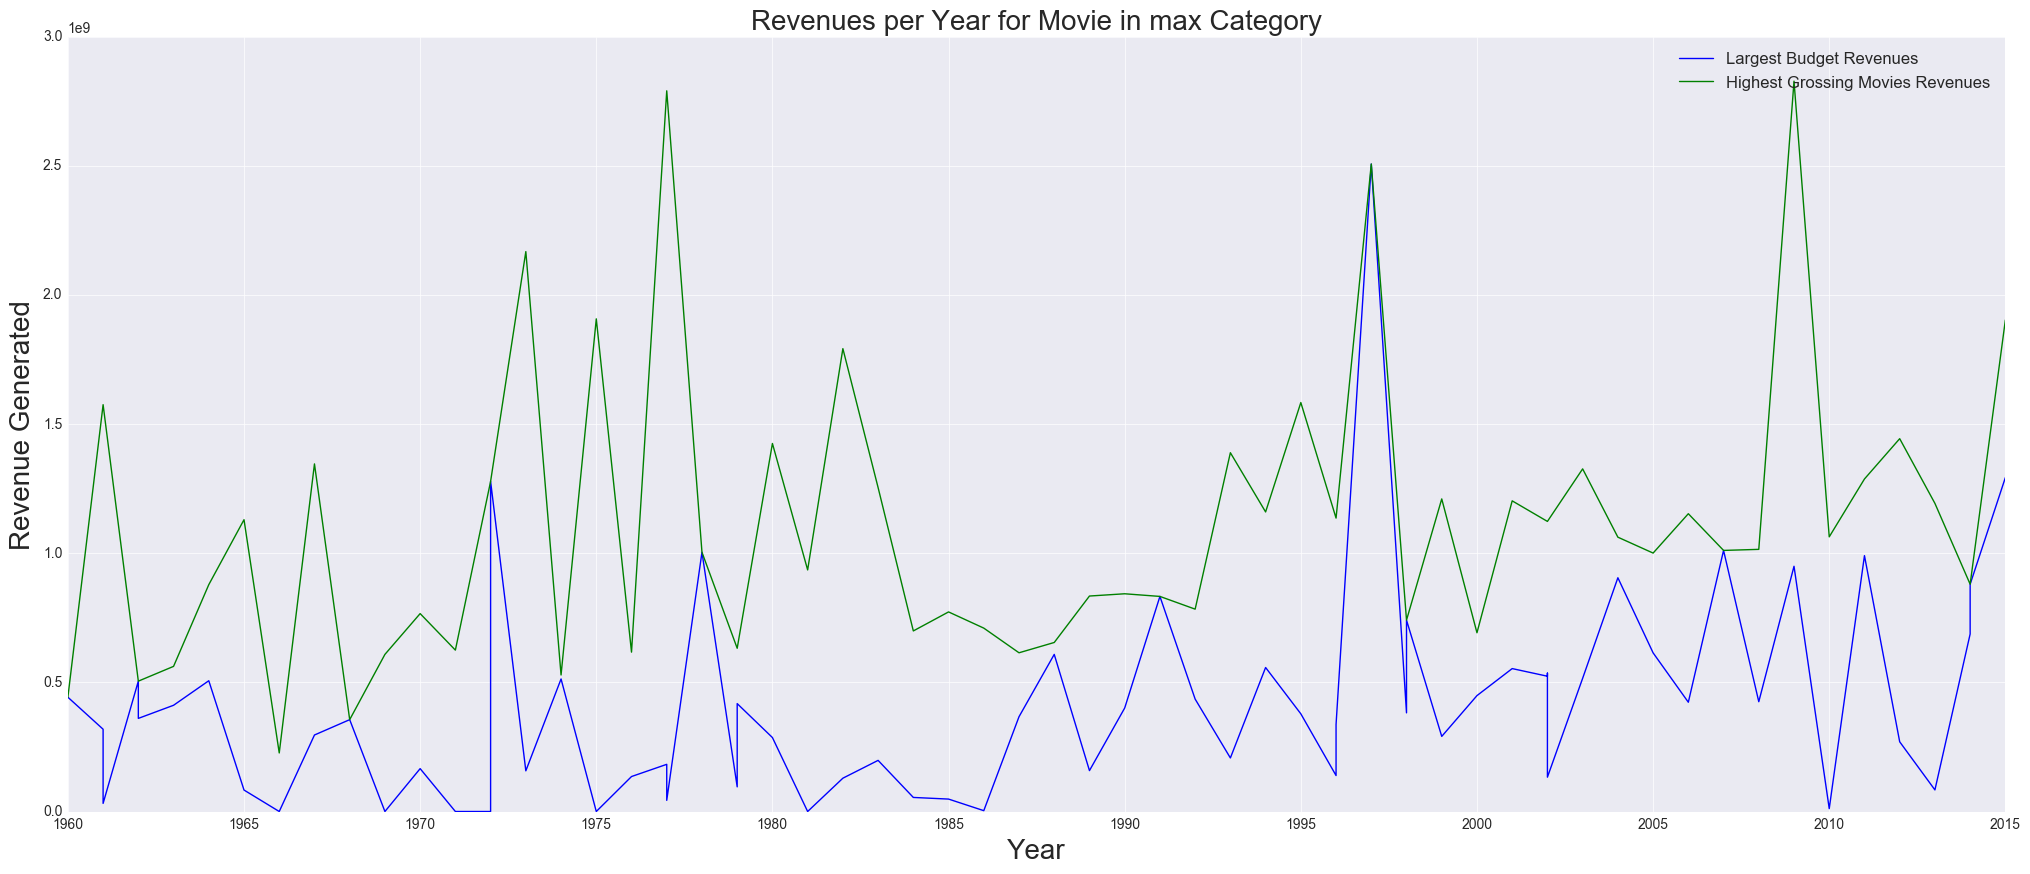

In [54]:
plt.figure(figsize=(25,10))

plt.xticks(x_axis_numbering)

largest_budget_revenues = plot_tmdb_data_by_release_year(movies_with_max_adj_budget, 'revenue_adj', 'Largest Budget Revenues')
highest_grossing_movies_revenues = plot_tmdb_data_by_release_year(movies_with_max_adj_revenue, 'revenue_adj', 'Highest Grossing Movies Revenues')

plt.title('Revenues per Year for Movie in max Category', fontsize = 20)
plt.xlabel('Year', fontsize=20)
plt.ylabel('Revenue Generated', fontsize=20)

plt.legend()

The above graph shows the relationship between adjusted revenues for movies_with_max_adj_budget and movies_with_max_adj_revenue. From this graph we can safely conclude that movie budget is at least a possible component in generating maximum revenues. While we can see that many of the movies in this graphic were the best selling movies for each year there are many that are not.

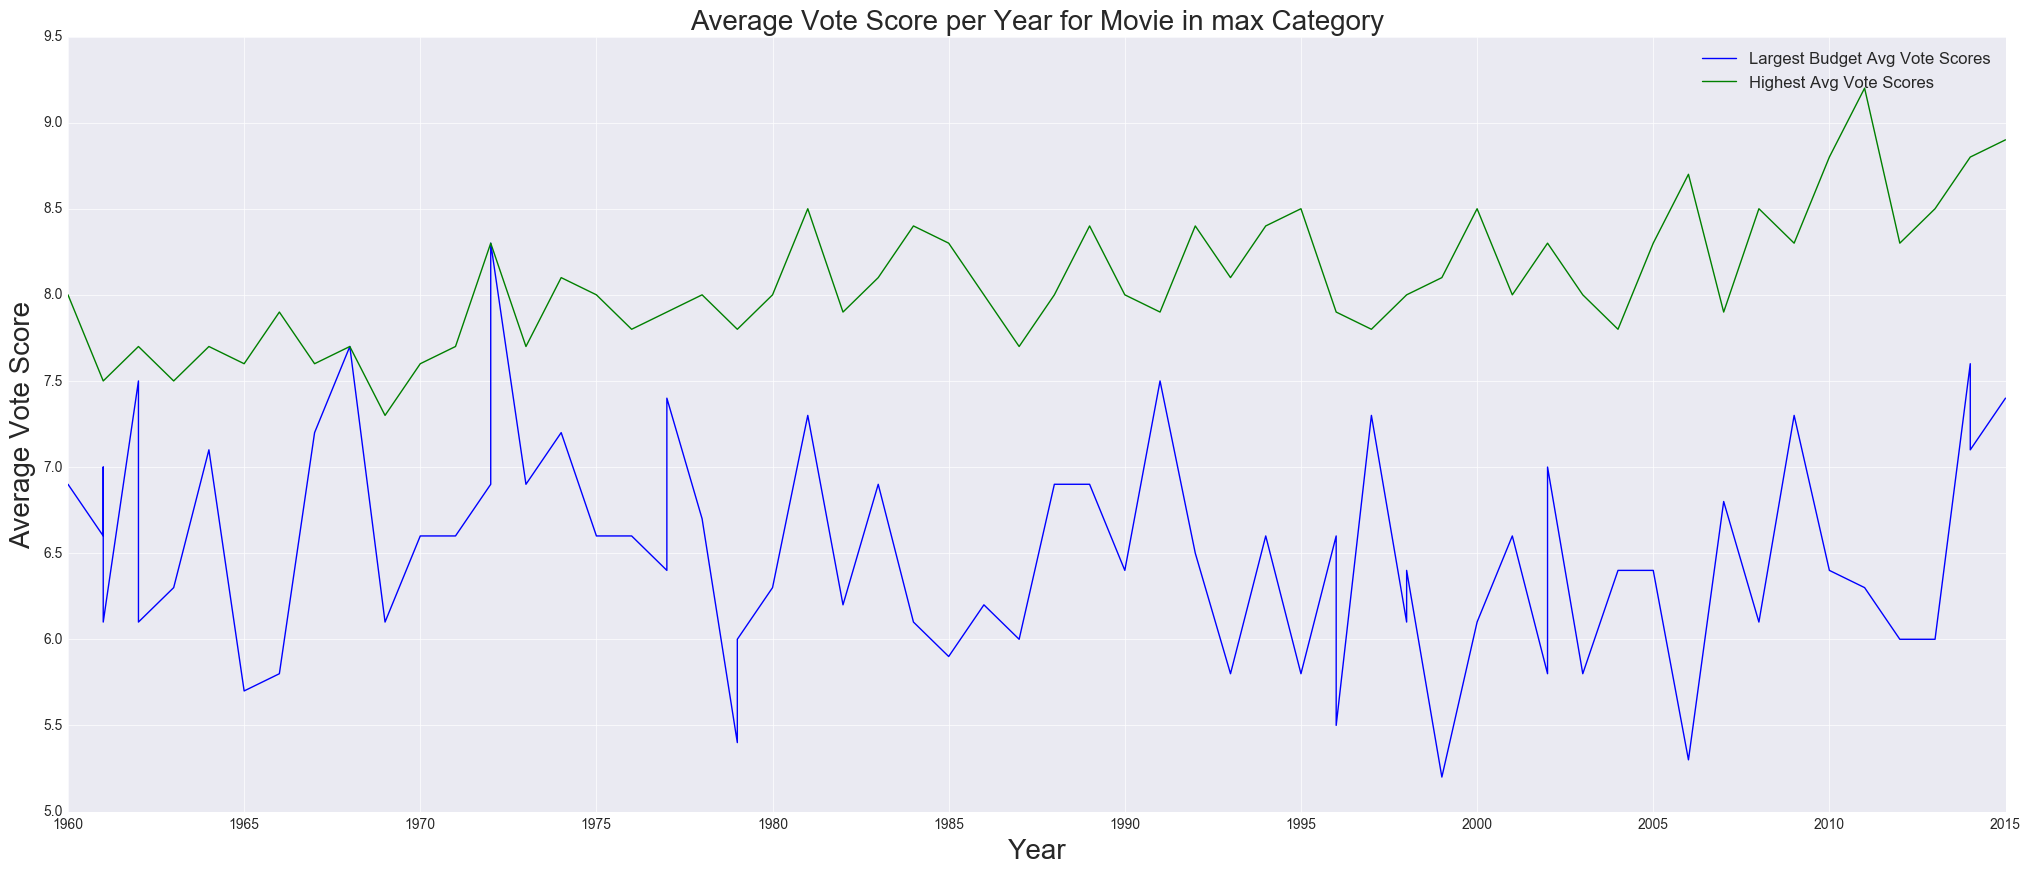

In [55]:
plt.figure(figsize=(25,10))

plt.xticks(x_axis_numbering)

plot_tmdb_data_by_release_year(movies_with_max_adj_budget, 'average_vote_score', 'Largest Budget Avg Vote Scores')
plot_tmdb_data_by_release_year(movies_with_max_average_vote_score, 'average_vote_score', 'Highest Avg Vote Scores')

plt.title('Average Vote Score per Year for Movie in max Category', fontsize = 20)
plt.xlabel('Year', fontsize=20)
plt.ylabel('Average Vote Score', fontsize=20)

plt.legend()

In the above graph we see that a movies budget had very little impact on it's average vote score compared to movies with the highest average voter scores for their respective years. Something to keep in mind with this particular analysis is that there is a wide range of total votes for movies as well as a wide range of viewer that have different viewing preferences.

## Conclusion
### It appears that although movie budget plays somewhat of a role in determening how large it's revenues may be, it is most certainly not the only factor that has to be explore. This reasoning does not seem to hold true for it's average voter score and more analysis must be done to find out what does and does not directly impact how users vote on certain movies.

# Question 2: Which genres did most movies fall under?

To answer this question I'm first going to split the genre's column into a dataframe containing distinct genres.

In [25]:
genre_grid = tmdb_data_edited['genres'].str.split('|',expand=True)
genre_grid.head()

,0,1,2,3,4
0,Action,Adventure,Science Fiction,Thriller,None
1,Action,Adventure,Science Fiction,Thriller,None
2,Adventure,Science Fiction,Thriller,None,None
3,Action,Adventure,Science Fiction,Fantasy,None
4,Action,Crime,Thriller,None,None


I will then find how often each genre occurs in each column.

In [26]:
A = genre_grid[0].value_counts().sort_index()
B = genre_grid[1].value_counts().sort_index()
C = genre_grid[2].value_counts().sort_index()
D = genre_grid[3].value_counts().sort_index()
E = genre_grid[4].value_counts().sort_index()

And with the following I will add up all the columns to get the final count of each genre.

In [27]:
sumAB = A.add(B,fill_value = 0)
sumCD = C.add(D,fill_value = 0)
count_of_each_genre = (sumAB + sumCD).add(E, fill_value = 0)

In [28]:
count_of_each_genre

Action            2385.000
Adventure         1471.000
Animation          699.000
Comedy            3793.000
Crime             1355.000
Documentary        520.000
Drama             4761.000
Family            1231.000
Fantasy            916.000
Foreign            188.000
History            334.000
Horror            1637.000
Music              408.000
Mystery            810.000
Romance           1712.000
Science Fiction   1230.000
TV Movie           167.000
Thriller          2908.000
War                270.000
Western            165.000
dtype: float64

To gain a visual understanding of this data I'm going to plot it into a bar graph

[<matplotlib.text.Text at 0x117d6898>, <matplotlib.text.Text at 0x1194f898>]

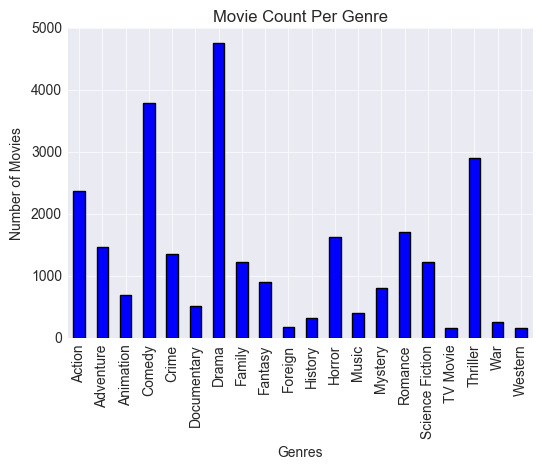

In [31]:
count_of_each_genre.plot.bar(title = "Movie Count Per Genre").set(xlabel="Genres", ylabel="Number of Movies")

## Conclusion: From this graph we can see that most movies classified themselves as dramas, it should be noted that many, if not all movies had many genre clasifications, that said, based on this data more often than not many movies included drama in there genre classification most of the time. What this means for this and similar analyses will not be very effective if trying to figure out the single genre that will impact a movies success (success is subjective) the most because it will be very unlikely that a movie will only be labeled as a drama. 

## Rather identfying the top genres would be the most benificial. For instance based on this bar graph, the most popular genres that movies label them selves with, Action, Comedy, Drama, and Thiller, perhaps it would be worth while analyzing movies with exactly those genre labels and comparing their revenues and voter scores with movies that did not label themselves with those genres exclusively.

## Aside from the limitations identified in the previous two analyses there is also the limitations of the dataset. For example, it is difficult to know and hard to believe that this dataset contains all movies that have ever been released. Among other limitations for example in this dataset there does not appear to be a way to distinguish revenues generated in the United States and revenues generated overseas, on top of the only success factors being revenues and user scores, this dataset omits others  such as what award various movies may hav achieved as well as many more limitations.

# Reference Links:
https://docs.scipy.org/doc/numpy-1.10.1/reference/generated/numpy.unique.html
http://maxmelnick.com/2016/04/19/python-beginner-tips-and-tricks.html
https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.html
https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.transform.html
https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.append.html
https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.sort_values.html
https://stackoverflow.com/questions/25681579/how-to-select-range-in-pandas-using-a-row
https://stackoverflow.com/questions/31069191/simple-line-plots-using-seaborn
https://stackoverflow.com/questions/18022845/pandas-index-column-title-or-name
https://stackoverflow.com/questions/16476924/how-to-iterate-over-rows-in-a-dataframe-in-pandas
https://stackoverflow.com/questions/21137150/format-suppress-scientific-notation-from-python-pandas-aggregation-results
https://stackoverflow.com/questions/13784192/creating-an-empty-pandas-dataframe-then-filling-it
https://stackoverflow.com/questions/17071871/select-rows-from-a-dataframe-based-on-values-in-a-column-in-pandas
https://stackoverflow.com/questions/15943769/how-do-i-get-the-row-count-of-a-pandas-dataframe
https://stackoverflow.com/questions/35818873/pandas-series-creation-using-dataframe-columns-returns-nan-data-entries
https://stackoverflow.com/questions/24943991/change-grid-interval-and-specify-tick-labels-in-matplotlib
https://stackoverflow.com/questions/332289/how-do-you-change-the-size-of-figures-drawn-with-matplotlib
https://stackoverflow.com/questions/15705630/python-getting-the-row-which-has-the-max-value-in-groups-using-groupby/40629420
https://stackoverflow.com/questions/22391433/count-the-frequency-that-a-value-occurs-in-a-dataframe-column
https://www.cheatography.com/weidadeyue/cheat-sheets/jupyter-notebook/pdf_bw/
https://pandas.pydata.org/pandas-docs/stable/generated/pandas.Series.plot.html
https://github.com/jupyter/jupyter/wiki/A-gallery-of-interesting-Jupyter-Notebooks#data-visualization-and-plotting
https://chrisalbon.com/python/data_wrangling/pandas_apply_operations_to_dataframes/
https://chrisalbon.com/python/data_wrangling/pandas_list_unique_values_in_column/
https://docs.scipy.org/doc/numpy/reference/generated/numpy.unique.html
https://www.youtube.com/watch?v=aCULcv_IQYw&index=2&list=PLQVvvaa0QuDfefDfXb9Yf0la1fPDKluPF
https://www.youtube.com/watch?v=rI0NfKKVkFE
https://www.youtube.com/watch?v=0uBirYFhizE
https://www.youtube.com/watch?v=56k63NuAZSo

